様々な一変数関数を入力に与え、予測させる

In [126]:
#学習セットと訓練セットに分割する関数
def divide_train_and_test(X, y, train_ratio):
    num_train = int(X.shape[0] * train_ratio)
    X_train, X_test = X[:num_train], X[num_train:]
    y_train, y_test = y[:num_train], y[num_train:]
    return X_train, X_test, y_train, y_test
    

In [127]:
#累乗の特徴量を作る関数(多項式回帰で用いる)
def make_pow(X, n):
    X_b = X.tolist()
    for i, val in enumerate(X_b):
        val = float(val[0])
        X_b[i] = [val**k for k in range(1, n+1)]
        X_b[i] = tuple(X_b[i])
    X_b = np.array(X_b)
    return X_b

In [129]:
#バイアス項に掛ける項を挿入する
def insert_ones(X):
    new_X = np.c_[np.ones((X.shape[0], )), X]
    return new_X

In [326]:
#mseの勾配を算出
def gradient(X, y, theta, sample_num):
    return 2 / sample_num * X.T.dot(X.dot(theta) - y)

In [ ]:
#ridge回帰の時の勾配
#def gradient_ridge(X, y, theta, sample_num, alpha):
    #ridge = theta[:]
    #ridge[0] = 0
    #return 2 / sample_num * X.T.dot(X.dot(theta) - y) + alpha * ridge

In [131]:
#勾配降下法
def gradient_descent(X, y, eta, iteration):
    theta = rng.random(size=(X.shape[1], 1))
    for i in range(iteration):
        grad = gradient(X, y, theta, y.shape[0])
        theta -= eta * grad
    return theta

In [132]:
#予測を算出
def predict_val(X, weight):
    return X.dot(weight)

In [398]:
#mseを算出
def mse(label, predict):
    mse = 0
    for i in range(label.shape[0]):
        mse += pow((predict[i] - label[i]), 2)
    mse /= label.shape[0]
    return mse

パイプライン化

In [206]:
def linear_regression(X, y, train_ratio=0.75, dimension=3, eta=0.1, iteration=100, retval='mse'):
    X_train, X_test, y_train, y_test = divide_train_and_test(X, y, train_ratio)
    X_poly = make_pow(X_train, dimension)
    X_data = insert_ones(X_poly)
    theta = gradient_descent(X_data, y_train, eta, iteration)
    y_predict = predict_val(X_data, theta)
    plt.plot(X_train, y_train, 'b.')
    plt.plot(X_train, y_predict, 'r.')
    plt.show()
    
    if (retval == 'weight'):
        return theta
    elif (retval == 'mse'):
        X_test_poly = make_pow(X_test, dimension)
        X_test_data = insert_ones(X_test_poly)
        y_test_predict = predict_val(X_test_data, theta)
        return mse(y_test, y_test_predict), theta

In [305]:
#早期打ち切り、何次関数のモデルが最適かを判断する
def early_stopping(X, y, max_dimension=5, train_ratio=0.75, eta=0.1, iteration=100):
    mses, thetas = [], []
    min_mse = np.float64('inf')
    best_theta = np.float64
    best_dimension = int
    for dimension in range(1, max_dimension + 1):
        mse, theta = linear_regression(X, y, train_ratio, dimension)
        mses.append(mse)
        thetas.append(theta)
        if mse < min_mse:
            min_mse = mse
            best_theta = theta
            best_dimension = dimension
    return best_theta, min_mse, best_dimension

お手本も置いておく

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random.default_rng()

１つ目
$$
    y = 5x + 4
$$

In [399]:
sample_num = 100
X = 3 * rng.random((sample_num, 1)) - 1.5
y = 5 * X + 4 + rng.standard_normal((sample_num, 1))

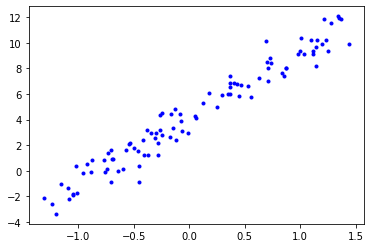

In [400]:
plt.plot(X, y, 'b.')
plt.show()

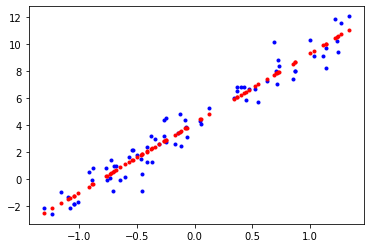

(array([0.77539572]),
 array([[4.1684017 ],
        [5.15717989]]))

In [401]:
linear_regression(X, y, dimension=1)

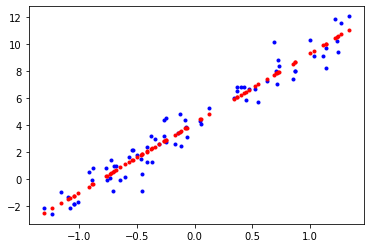

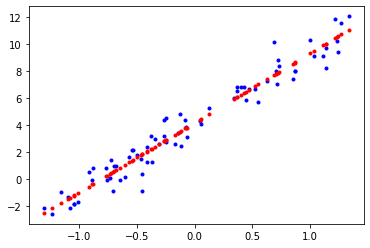

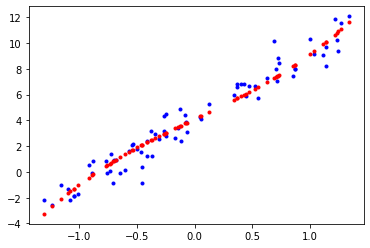

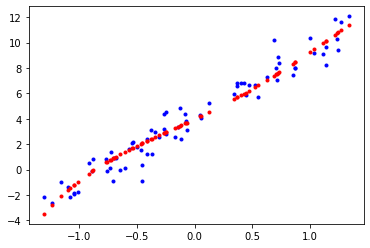

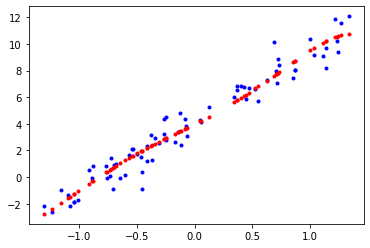

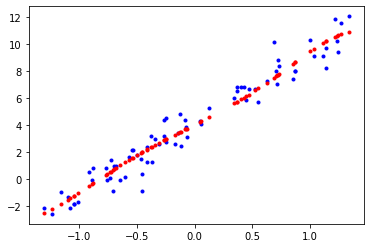

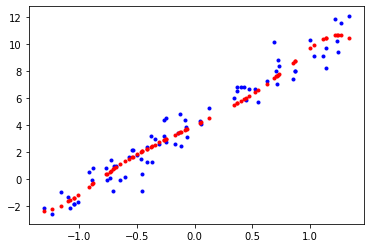

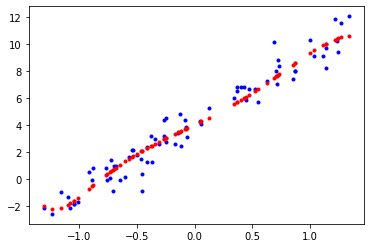

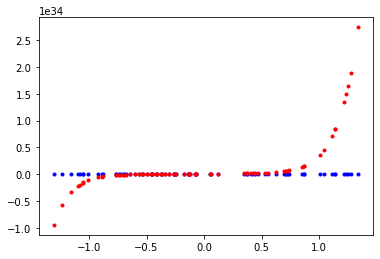

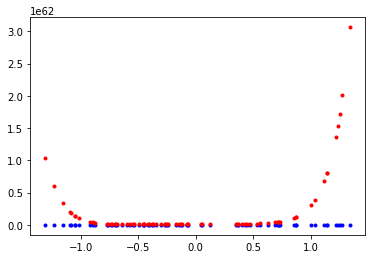

(array([[4.16840095],
        [5.15717076]]),
 array([0.77539474]),
 1)

In [402]:
early_stopping(X, y, 10)

２つ目
$$
    y = x^2 + 4
$$

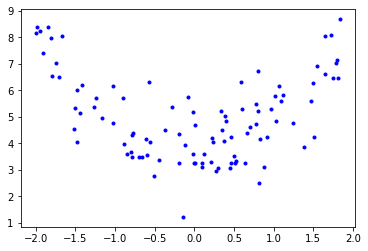

In [356]:
X = 4 * rng.random((sample_num, 1)) - 2
y = X**2 + 4 + rng.standard_normal((sample_num, 1))
plt.plot(X, y, 'b.')
plt.show()

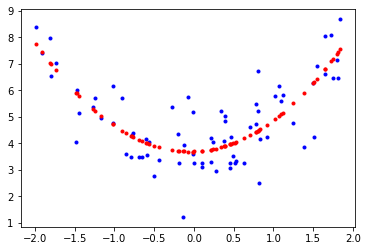

(array([1.00246035]),
 array([[3.69640965],
        [0.10721513],
        [1.08002222]]))

In [357]:
linear_regression(X, y, dimension=2)

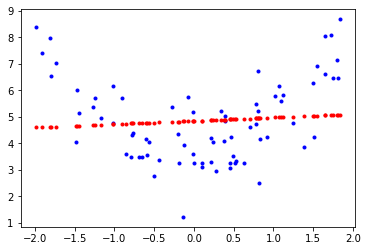

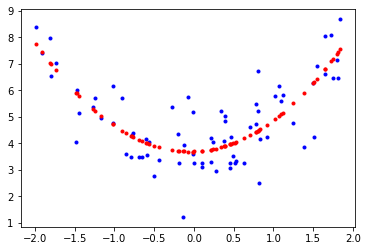

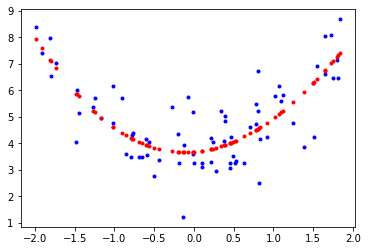

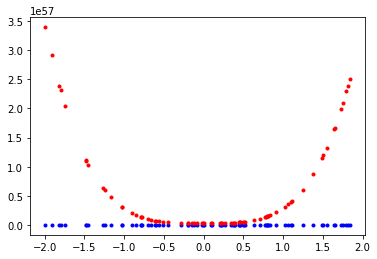

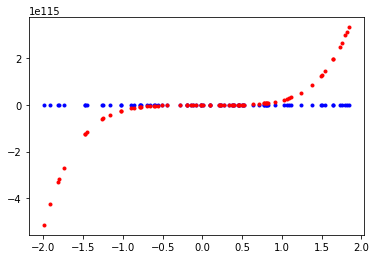

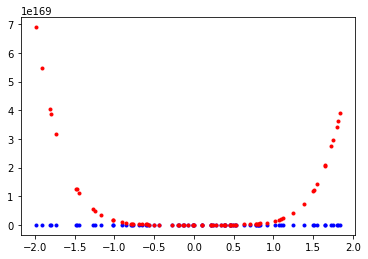

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2


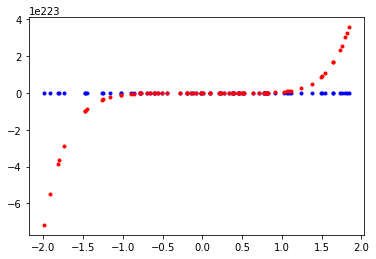

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2


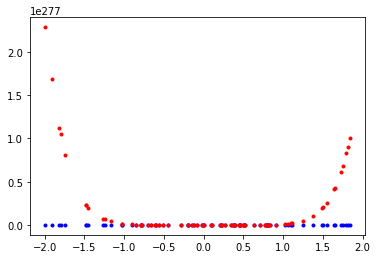

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2


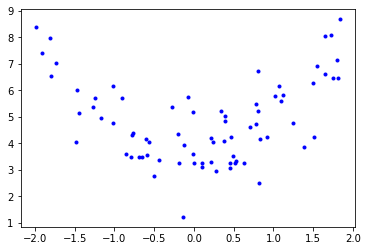

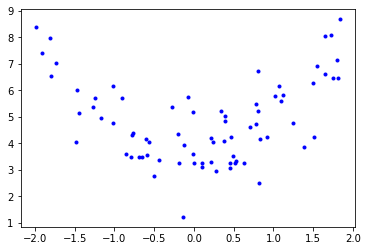

(array([[ 3.68986051],
        [ 0.25069348],
        [ 1.0794672 ],
        [-0.06164384]]),
 array([0.97538111]),
 3)

In [358]:
early_stopping(X, y, 10)

In [325]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-1.72973844]), array([[7.11746493, 2.07324736]]))

３つ目
$$
    y = x^3 + x^2 + x + 1
$$

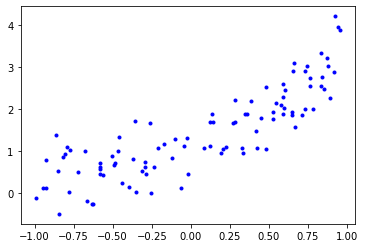

In [353]:
sample_num = 100
X = 2 * rng.random((sample_num, 1)) - 1
y = X**3 + X**2 + X + 1 + rng.standard_normal((sample_num, 1)) / 2
plt.plot(X, y, 'b.')
plt.show()

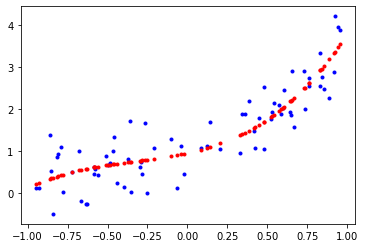

(array([0.22405344]),
 array([[0.96215533],
        [0.83921229],
        [1.00166098],
        [1.00611975]]))

In [354]:
linear_regression(X, y, dimension=3)

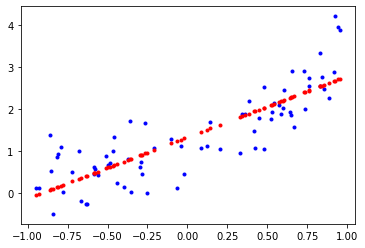

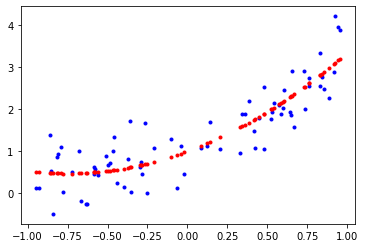

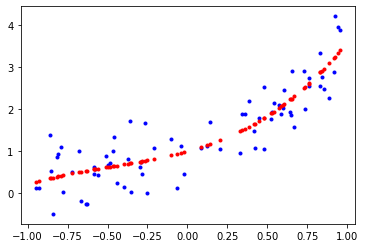

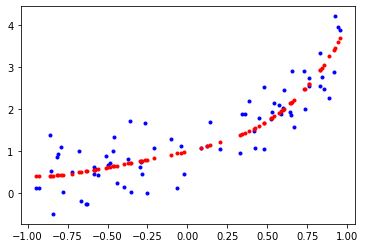

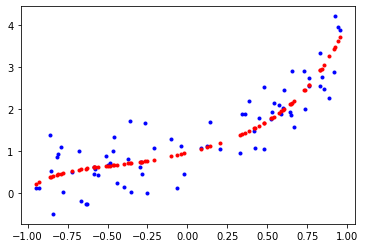

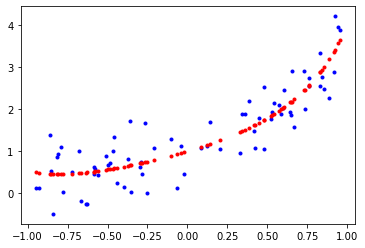

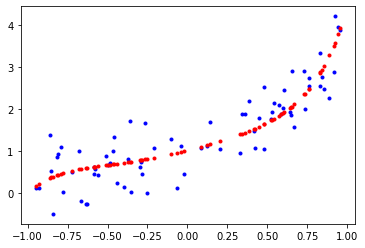

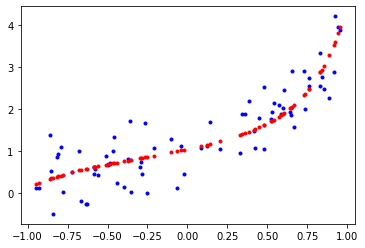

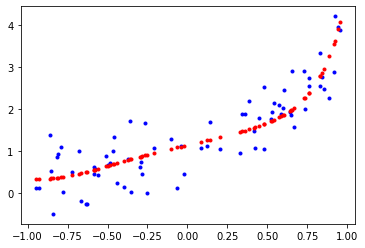

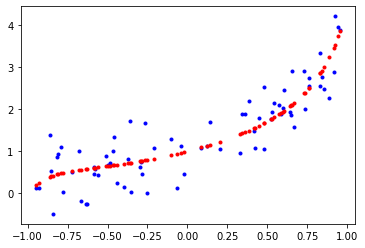

(array([[0.9999808 ],
        [1.41200255],
        [0.93798745]]),
 array([0.19518727]),
 2)

In [355]:
early_stopping(X, y, 10)

4つ目
$$
    y = cosx
$$

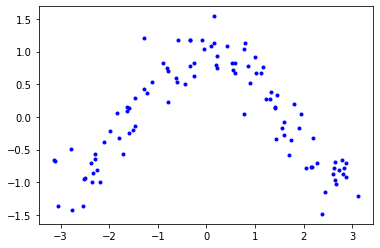

In [339]:
X = 2 * np.pi * rng.random((sample_num, 1)) - np.pi
y = np.cos(X) + rng.standard_normal((sample_num, 1)) * 0.25
plt.plot(X, y, 'b.')
plt.show()

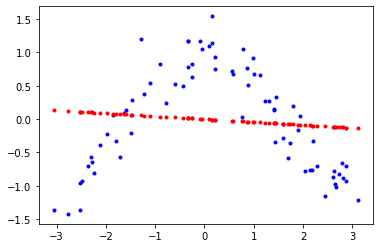

(array([0.64459585]),
 array([[-0.0009084 ],
        [-0.04404306]]))

In [340]:
linear_regression(X, y, dimension=1)

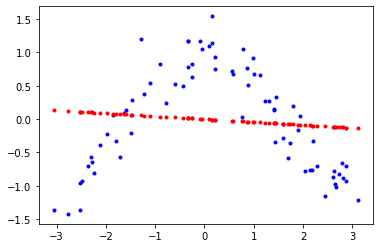

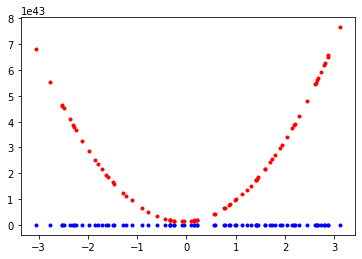

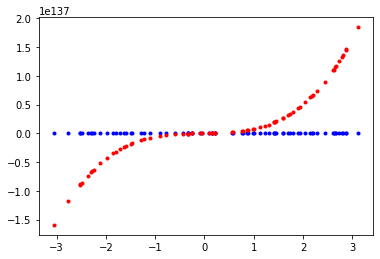

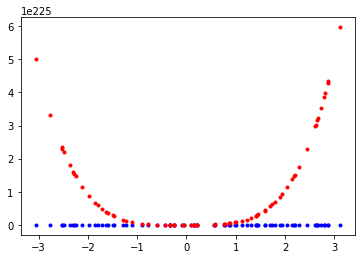

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2
/tmp/ipykernel_152558/1657501727.py:6: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * grad


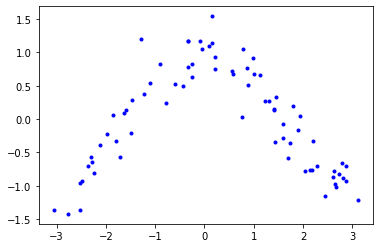

/tmp/ipykernel_152558/1657501727.py:6: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * grad


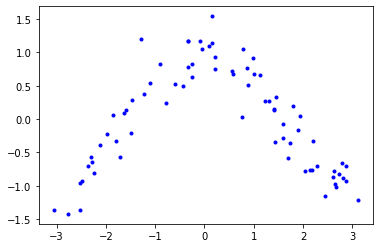

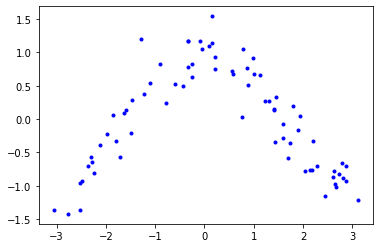

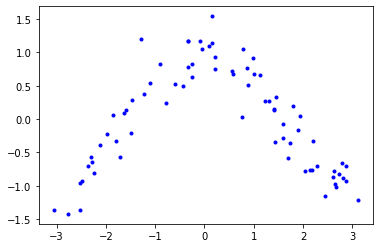

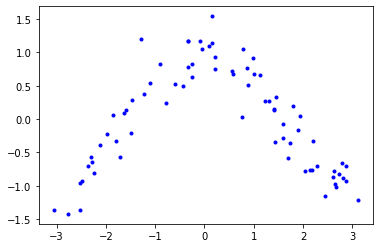

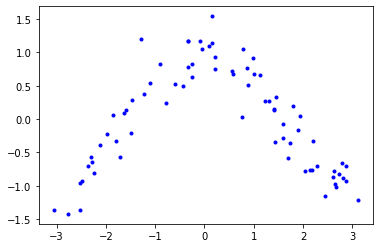

(array([[-0.0009084 ],
        [-0.04404306]]),
 array([0.64459585]),
 1)

In [341]:
early_stopping(X, y, 10)

5つ目
$$
    y = e^x
$$

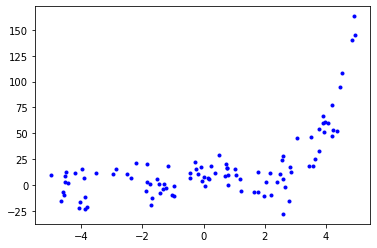

In [322]:
X = 10 * rng.random((sample_num, 1)) - 5
y = pow(np.e, X) + rng.standard_normal((sample_num, 1)) * 15
plt.plot(X, y, 'b.')
plt.show()

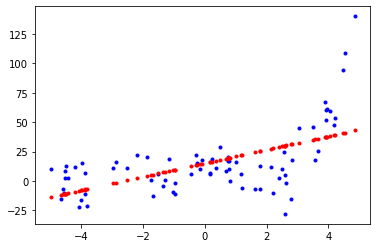

(array([1257.4573091]),
 array([[15.08619934],
        [ 5.74546069]]))

In [323]:
linear_regression(X, y, dimension=1)

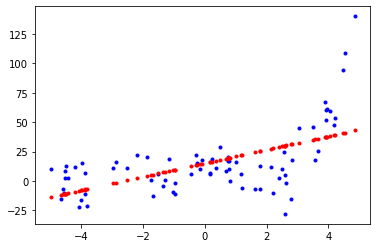

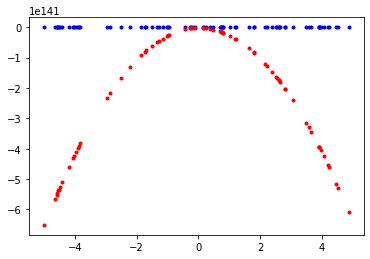

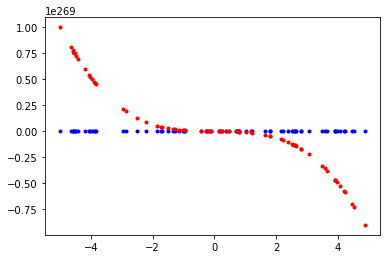

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2


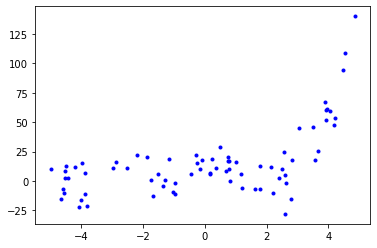

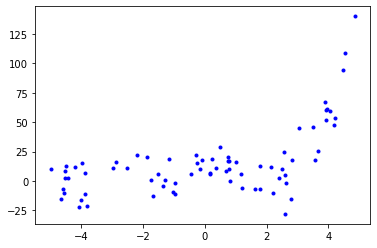

(array([[15.08619934],
        [ 5.74546069]]),
 array([1257.4573091]),
 1)

In [324]:
early_stopping(X, y, 10)

6つ目
$$
    y = \frac{1}{1 + e^{-x}}
$$

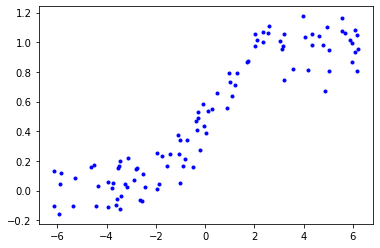

In [343]:
X = 4 * np.pi * rng.random((sample_num, 1)) - 2 * np.pi
y = 1 / (1 + pow(np.e, -1 * X)) + rng.standard_normal((sample_num, 1)) / 10
plt.plot(X, y, 'b.')
plt.show()

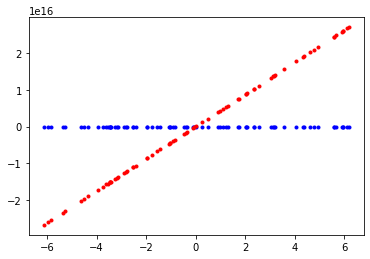

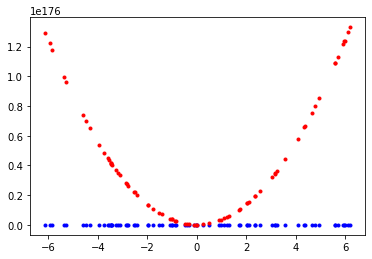

/tmp/ipykernel_152558/3982875803.py:5: RuntimeWarning: overflow encountered in square
  mse += (predict[i] - label[i])**2


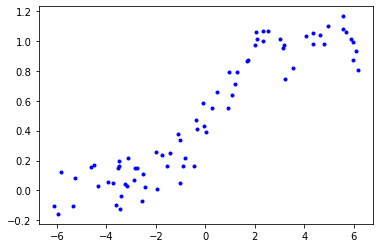

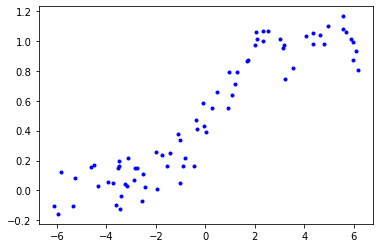

/tmp/ipykernel_152558/1657501727.py:6: RuntimeWarning: invalid value encountered in subtract
  theta -= eta * grad


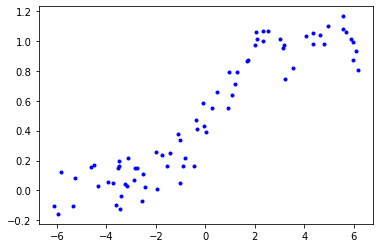

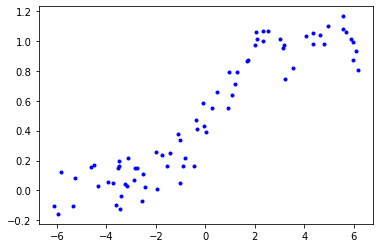

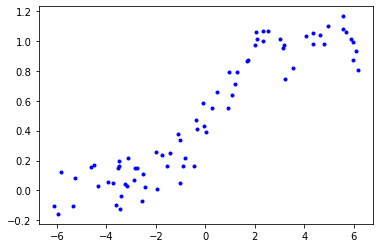

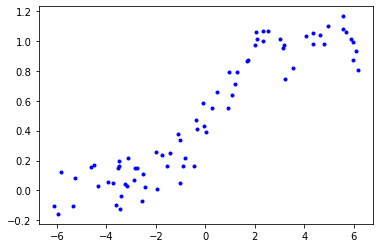

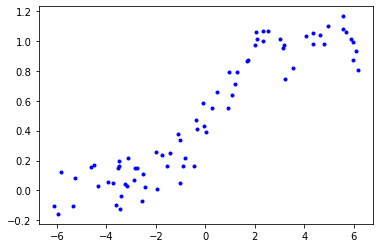

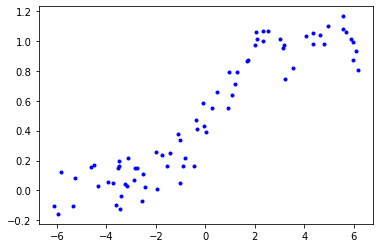

(array([[1.12477589e+13],
        [4.36148626e+15]]),
 array([2.94705553e+32]),
 1)

In [344]:
early_stopping(X, y, 10)